# [POLSCI 5] Civil Wars

Estimated Time: 30-40 Minutes <br>
Created by: Lauren Hom, Ravi Singhal

In this notebook, we will be TO DO

### Table of Contents 
1 - [Jupyter Introduction](#1) <br>
2 - [The Dataset](#2)<br>
3 - [Civil Wars](#3)<br>
4 - [Visualize the Data](#4)<br>
5 - [Bibliography](#5)

# Jupyter Introduction <a id='1'></a>

This webpage is a Jupyter Notebook. We will use this notebook to analyze a UCDP Conflict Termination Dataset. Jupyter Notebooks are composed of both regular text and code cells. Code cells have a gray background. In order to run a code cell, click the cell and press `Shift + Enter` while the cell is selected or hit the `▶| Run` button in the toolbar at the top. An example of a code cell is below. Try running it. If everything works properly, the word "Success" should be printed under the cell.

In [2]:
# This cell sets up the notebook. Just run this cell.
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

print("Success!")

Success!


# The Dataset <a id='2'></a>

This dataset contains information about conflicts around world from 1946-2013. Here is the description of dateset by the author, Joadim Kreutz.

> "Armed conflict is defined by Uppsala Conflict Data Program (UCDP) a contested incompatibility that concerns government and/or territory where the use of armed force between two parties, of which at least one is the government of a state, results in at least 25 battle-related deaths in a calender-year."

> "A conflict episode, thus, is defined as the a continuous period of active conflict years in the UCDP-PRIO armed conflict dataset. A conflict episode ends when an active year is followed by a year in which there are fewer than 25 battle-related deaths."


<br>If you want to read more about the dataset, click [here](https://www.pcr.uu.se/research/ucdp/).

<br>Here are the first 5 rows of the dataset. You can scroll horizontally when hovering over the table to see the whole data set. There are 2741 rows and 33 columns

In [35]:
raw = Table.read_table('ucdp-term-dyadic-2015.csv') # read in the dataset
raw.show(5)

ConflictId,DyadId,DyadEp,Year,Location,SideA,SideA2nd,SideB,SideBID,SideB2nd,Incompatibility,TerritoryName,IntensityLevel,TypeOfConflict,Type2,StartDate,StartPrec,StartDate2,StartPrec2,Dyadterm,EpEndDate,EpEndPrec,Outcome_early,Outcome,CfireDate,PeAgDate,GWNoA,GWNoA2nd,GWNoB,GWNoB2nd,GWNoLoc,Region,Version
1-191,1,101,"1,992",Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,"1,993",Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,"1,994",Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,2,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,"1,995",Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,"1,996",Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015


As you can see, there are quite a few columns and many missing values (nan) in the dataset. We have cleaned the dataset by removing some columns and making the values more readable. The cleaned dataset has 16 columns.

In [53]:
wars = Table.read_table('cleanedWars.csv') # read in the dataset
wars.set_format('Year', formats.FunctionFormatter(lambda x: x)) # fix format of year column
wars.show(5)

Year,Location,SideA,SideA_Ally,SideB,SideB_Ally,DisagreementOver,TerritoryName,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,CeasefireDate,PeaceAgreementDate,Region
1992,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1993,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1994,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,War (at least 1000 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1995,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1996,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa


## Rows
Let's dive in! <br><br>

First, let's examine what a *row* is. Here is the first row of the dataset.

In [54]:
wars.take(0) # take the first row

Year,Location,SideA,SideA_Ally,SideB,SideB_Ally,DisagreementOver,TerritoryName,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,CeasefireDate,PeaceAgreementDate,Region
1992,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa


This row gives us information about a specific conflict happening in Algeria in the year 1992. One thing to note is that the `IntensityLevel` of the conflict during this year is Minor.

In [55]:
wars.take(2) # take the third row

Year,Location,SideA,SideA_Ally,SideB,SideB_Ally,DisagreementOver,TerritoryName,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,CeasefireDate,PeaceAgreementDate,Region
1994,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,War (at least 1000 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa


In comparison, by looking at the third row of the dataset, we can see that the same conflict has now changed to have an `IntensityLevel` of War in the year 1994. Each row of this dataset describes one year of one conflict.

## Columns
### Location
To understand what a *column* is, let's look at a few examples. First, we shall examine the `Location` column. According to the author of the dataset, 
> "Location is defined as the government side of a conflict, and should not be interpreted as the geographical location of the conflict."

To get an idea of what kinds of values are in the `Location` column, here are the number of occurences of the 10 most common locations.

In [56]:
locations = wars.group('Location').sort('count', descending=True) # group by location and sort in descending order
locations

Location,count
Myanmar (Burma),314
India,178
Ethiopia,136
Israel,123
Philippines,121
Afghanistan,120
Colombia,93
Iraq,80
Angola,71
Sudan,70


The author also tells us,
> The string is split in two ways, hyphen (‘-‘) splits the different sides in an interstate war, and comma (‘,’) splits different countries fighting together on the same side.

Let's look at these two cases.

In [57]:
# Locations with the two sides of an interstate war
locations.where('Location', are.containing('-'))

Location,count
Bosnia-Herzegovina,15
Guinea-Bissau,13


In [58]:
# Locations with countries that are fighting on the same side
locations.where('Location', are.containing(','))

Location,count
"India, Pakistan",19
"South Vietnam, Vietnam (North Vietnam)",11
"Iran, Iraq",10
"China, Vietnam (North Vietnam)",10
"North Korea, South Korea",5
"Indonesia, Malaysia",4
"Ethiopia, Somalia",4
"Egypt, Israel",4
"China, Taiwan",4
"Laos, Thailand",3


### Region
Now let's look at the `Region` column. Again, first we'll look at the number of occurences of each region.

In [59]:
regions = wars.group('Region').sort('count', descending=True) # count occurences of each region
regions

Region,count
Asia,"1,141"
Africa,828
Middle East,371
Americas,256
Europe,134
"Europe, Middle East",4
"Europe, Asia",4
"Europe, Middle East, Asia, Americas",1
"Europe, Americas",1
"Europe, Africa",1


In case you were curious, here is the row that took place in Europe, Middle East, Asia, and Americas. This marks the beginning of the Iraq War in 2003. For more info, click [here](https://en.wikipedia.org/wiki/Iraq_War).

In [60]:
wars.where('Region', 'Europe, Middle East, Asia, Americas')

Year,Location,SideA,SideA_Ally,SideB,SideB_Ally,DisagreementOver,TerritoryName,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,CeasefireDate,PeaceAgreementDate,Region
2003,"Iraq, Australia, United Kingdom, United States of America","Government of Australia, Government of United Kingdom, G ...",nan,Government of Iraq,nan,Government,nan,War (at least 1000 battle-related deaths),Interstate armed conflict,2003-03-20,4/9/03,Victory for Side A /Government Side,nan,nan,"Europe, Middle East, Asia, Americas"


### Intensity Level
Lastly, we'll look at the `IntensityLevel` column. 
>The intensity variable is coded in two categories:
>1. Minor: between 25 and 999 battle-related deaths in a given year.
>2. War: at least 1,000 battle-related deaths in a given year.

Here are the counts of each type.

In [61]:
wars.group('IntensityLevel') # group by IntensityLevel

IntensityLevel,count
Minor (between 25 and 999 battle-related deaths),"2,121"
War (at least 1000 battle-related deaths),620


Let's break it down by region. First let's look at the counts of each `IntensityLevel` in each region.

In [75]:
wars.group(['Region', 'IntensityLevel']).sort('count', descending=True).show() # group by Region and IntensityLevel

Region,IntensityLevel,count
Asia,Minor (between 25 and 999 battle-related deaths),860
Africa,Minor (between 25 and 999 battle-related deaths),634
Middle East,Minor (between 25 and 999 battle-related deaths),298
Asia,War (at least 1000 battle-related deaths),281
Americas,Minor (between 25 and 999 battle-related deaths),223
Africa,War (at least 1000 battle-related deaths),194
Europe,Minor (between 25 and 999 battle-related deaths),99
Middle East,War (at least 1000 battle-related deaths),73
Europe,War (at least 1000 battle-related deaths),35
Americas,War (at least 1000 battle-related deaths),33


Let's look specifically at the Middle East. Here are the counts of each type of conflict in each Middle East location.

In [77]:
# filter by region, then group by location and intensity level
m_east = wars.where('Region', 'Middle East').group(['Location', 'IntensityLevel']).sort('count', descending=True)
m_east

Location,IntensityLevel,count
Israel,Minor (between 25 and 999 battle-related deaths),121
Iraq,Minor (between 25 and 999 battle-related deaths),59
Iran,Minor (between 25 and 999 battle-related deaths),39
Turkey,Minor (between 25 and 999 battle-related deaths),25
Iraq,War (at least 1000 battle-related deaths),21
Yemen (North Yemen),Minor (between 25 and 999 battle-related deaths),12
Lebanon,Minor (between 25 and 999 battle-related deaths),11
Yemen (North Yemen),War (at least 1000 battle-related deaths),10
"Iran, Iraq",War (at least 1000 battle-related deaths),9
Turkey,War (at least 1000 battle-related deaths),8


Lastly, here are the Middle East locations with the most wars.

In [78]:
m_east.where('IntensityLevel', are.containing('War')) # filter to just show war rows

Location,IntensityLevel,count
Iraq,War (at least 1000 battle-related deaths),21
Yemen (North Yemen),War (at least 1000 battle-related deaths),10
"Iran, Iraq",War (at least 1000 battle-related deaths),9
Turkey,War (at least 1000 battle-related deaths),8
Lebanon,War (at least 1000 battle-related deaths),5
Iran,War (at least 1000 battle-related deaths),5
Syria,War (at least 1000 battle-related deaths),4
"Israel, Syria",War (at least 1000 battle-related deaths),2
Israel,War (at least 1000 battle-related deaths),2
"Iraq, Kuwait",War (at least 1000 battle-related deaths),2


# Civil Wars <a id='3'></a>
Here is the original dataset again.

In [79]:
wars.show(5)

Year,Location,SideA,SideA_Ally,SideB,SideB_Ally,DisagreementOver,TerritoryName,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,CeasefireDate,PeaceAgreementDate,Region
1992,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1993,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1994,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,War (at least 1000 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1995,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1996,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa


Let's look specifically at civil wars.

In [81]:
civil_wars = wars.where('TypeOfConflict', 'Internal armed conflict') # remove all non civil war rows
civil_wars.show(5)

Year,Location,SideA,SideA_Ally,SideB,SideB_Ally,DisagreementOver,TerritoryName,IntensityLevel,TypeOfConflict,StartDate,EndDate,Outcome,CeasefireDate,PeaceAgreementDate,Region
1992,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1993,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1994,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,War (at least 1000 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1995,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa
1996,Algeria,Government of Algeria,nan,AIS,nan,Government,nan,Minor (between 25 and 999 battle-related deaths),Internal armed conflict,1985-08-27,nan,nan,nan,nan,Africa


Notice the change in the number of rows when we remove all the rows that do not correspond to civil wars.

In [84]:
print("The original dataset has {} rows. \n\
After removing all non civil war rows, the dataset has {} rows left.".format(wars.num_rows, civil_wars.num_rows))

The original dataset has 2741 rows. 
After removing all non civil war rows, the dataset has 2091 rows left.


First, let's find which years had the most civil wars.

In [88]:
years = civil_wars.group('Year').sort('count', descending = True) # count number of occurences of each year
years.set_format('Year', formats.FunctionFormatter(lambda x: x)) # fix format of year column
years

Year,count
1991,62
1990,60
1994,56
1992,52
1997,48
1993,46
1996,45
1989,45
1987,45
1986,44


# Outline
## 1. Introduction - how to use Jupyter
## 2. The dataset
### a) Context of the dataset 
"This dataset provide information on specific start- and end- dates for conflict activity and means of termination for each conflict episode. The data is available as a conflict-level dataset which correspond with the UCDP/PRIO Armed Conflict Dataset v4 – 2015, and a dyad-level dataset which correspond with the UCDP Dyadic Dataset v1 – 2015"

Citation: Kreutz, Joakim. 2010. “How and When Armed Conflicts End: Introducing the UCDP Conflict Termination Dataset," Journal of Peace Research 47(2): 243-250.

State that dataset includes wars from 1946 - 2017 (unless you want to show this in the dataset using code commands)
Explain how there's a code book that went along with it for reading the data?

### b) what does a column represent

Explaining the main columns, especially those where the title of the columns can be misleading (e.g. Location)
Explaining the columns which require looking at codebook to understand values in column 

If we don't clean the data beforehand, should we explain those columns too or just summarize them in groups?

### c) what does a row represent

Isolating a row -- possibly a row that shows the year a war started and a year within a war (i.e. not a year that a war started) 

## 3. Civil wars
### a) begin cleaning data
#### 1. fix year column, potentially replace some codes with what they actually represent
 (See section below on "Data Cleaning" for specifics) 

### b) show how # rows/columns decrease
### c) relabel termination type???
## 4. Visualization
### a) maybe some graph about the entities involved or number of conflicts over time

## Type of Conflict 
"The coding of outcomes are based on the final year of activity and first
year of non-activity. While the dataset include some information (i.e. ceasefires
and peace agreements) outside this window, it does not follow warring party
development beyond this time period."

**Attempt to summarize in own words:**


The result of the war determined by the final year of the war and the first year of no war activity. It does not account for any type of war or violence that occurred after this time frame.

(???) Difference between Type of Conflict and Outcome?

## Type of Conflict Key 
- 1= Peace agreement
- 2= Ceasefire agreement
- 3= Victory for government side/Side A
- 4= Victory for rebel side/Side B

## Type 2 Key
"The same conflict episode, or dyadic conflict episode, may include both years
where neither side receive secondary support and years when they do. Type
2 thus combine the categories of internal armed conflict and internationalized
armed conflict described above.
1. Extrasystemic armed conflict.
2. Interstate armed conflict.
3. Intrastate armed conflict."



# Civil Wars

In [82]:
civil = wars.where('TypeOfConflict', are.equal_to(3))
civil

ConflictId,DyadId,DyadEp,Year,Location,SideA,SideA2nd,SideB,SideBID,SideB2nd,Incompatibility,TerritoryName,IntensityLevel,TypeOfConflict,Type2,StartDate,StartPrec,StartDate2,StartPrec2,Dyadterm,EpEndDate,EpEndPrec,Outcome_early,Outcome,CfireDate,PeAgDate,GWNoA,GWNoA2nd,GWNoB,GWNoB2nd,GWNoLoc,Region,Version
1-191,1,101,"1,992",Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,"1,993",Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,"1,994",Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,2,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,"1,995",Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,"1,996",Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,1,101,"1,997",Algeria,Government of Algeria,nan,AIS,1389,nan,2,nan,1,3,3,1985-08-27,1,1992-03-10,5,1,10/1/97,1,2,2,10/1/97,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,2,201,"1,991",Algeria,Government of Algeria,nan,Takfir wa'l Hijra,1388,nan,2,nan,1,3,3,1990-12-20,1,1991-12-09,1,1,12/31/91,5,5,6,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,3,301,"1,993",Algeria,Government of Algeria,nan,GIA,1390,nan,2,nan,1,3,3,1992-02-10,1,1993-12-31,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,3,301,"1,994",Algeria,Government of Algeria,nan,GIA,1390,nan,2,nan,1,3,3,1992-02-10,1,1993-12-31,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015
1-191,3,301,"1,995",Algeria,Government of Algeria,nan,GIA,1390,nan,2,nan,2,3,3,1992-02-10,1,1993-12-31,5,0,nan,nan,nan,nan,nan,nan,615,nan,nan,nan,615,4,2.0-2015


In [83]:
wars_rows = wars.num_rows
civil_rows = civil.num_rows

print('there are:', wars_rows, 'rows in the whole dataset' )
print('the are:', civil_rows, 'rows that represent civil wars' )

there are: 2741 rows in the whole dataset
the are: 2091 rows that represent civil wars


In [84]:
civil.group('Year').sort('count', descending = True)

Year,count
"1,991",62
"1,990",60
"1,994",56
"1,992",52
"1,997",48
"1,993",46
"1,996",45
"1,989",45
"1,987",45
"1,986",44


In [85]:
civil.group('Location').sort('count', descending = True)

Location,count
Myanmar (Burma),314
India,178
Ethiopia,123
Philippines,121
Israel,120
Colombia,93
Sudan,68
Iraq,60
Indonesia,50
Guatemala,50


In [86]:
civil.group('SideA').sort('count', descending = True)

SideA,count
Government of Myanmar (Burma),314
Government of India,178
Government of Ethiopia,123
Government of Philippines,121
Government of Israel,120
Government of Colombia,93
Government of Sudan,68
Government of Iraq,60
Government of Indonesia,50
Government of Guatemala,50


In [87]:
civil.group('SideB').sort('count', descending = True)

SideB,count
FARC,48
CPP,44
KNU,43
CPB,41
KIO,36
ELN,32
OLF,31
PKK,30
KNUP,27
Kashmir insurgents,25


# Visualize the Data <a id='4'></a>

Visualization of the number of civil wars over time 

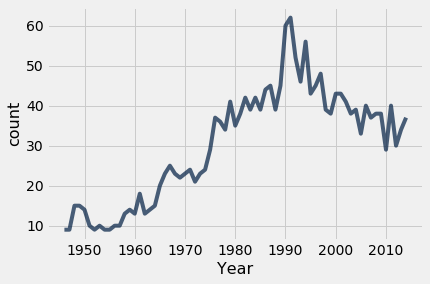

In [91]:
civil_trend = civil.group('Year')

civil_trend.plot('Year')

# Bibliography <a id='5'></a>
* Kreutz, Joakim, 2010. How and When Armed Conflicts End: Introducing the UCDP Conflict Termination Dataset. *Journal of Peace Research* 47(2): 243-250.